### Polynomial Regression

<details open>
  <summary>Notes</summary>

This model fits a non-linear regression line to relationships which simple linear regression cannot handle.

* Sensitive to outliers and can overfit
* Avoid extrapolation beyond observed data limits
* Be cautious with pronounced polynomial curves
</details>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from sklearn import metrics
import session_info

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head(1)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


<div class="alert alert-block alert-danger">Important</div>

In [3]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
# plots
x = cdf.ENGINESIZE
y = cdf.CO2EMISSIONS

# train/test data preparation
col_x = 'ENGINESIZE'
col_y = 'CO2EMISSIONS'


#### Plot

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

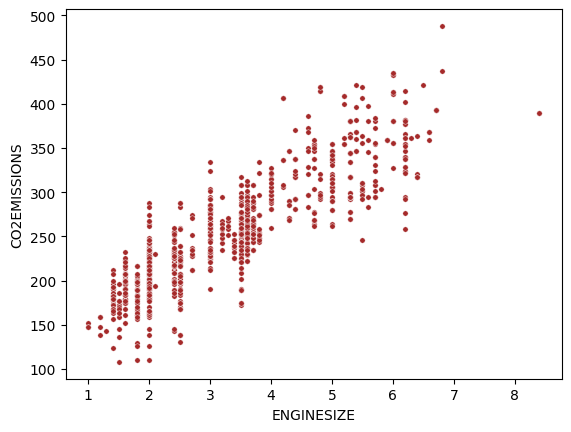

In [4]:
sns.scatterplot(x=x, y=y, s=15, color='brown')

#### Split train and test dataset

In [5]:
train_data, test_data = train_test_split(cdf, test_size=0.2, random_state=0)
print("Size of train_data:", train_data.shape, "| Size of test_data:", test_data.shape)

Size of train_data: (853, 2) | Size of test_data: (214, 2)


#### Data preparation

In [6]:
train_x = train_data[col_x].values.reshape(-1,1)
train_y = train_data[col_y].values.reshape(-1,1)

test_x = test_data[col_x].values.reshape(-1,1)
test_y = test_data[col_y].values.reshape(-1,1)

#### Generate polynomial features 

In [7]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.transform(test_x)

#### Train a linear regression model using polynomial features

In [8]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y) # regr contains the trained linear regression model with the learned coefficients.

LinearRegression()

#### Evaluation

In [9]:
y_pred = regr.predict(test_x_poly)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_pred))

r2 = r2_score(test_y, y_pred)
meanAbErr = metrics.mean_absolute_error(test_y, y_pred)
meanSqErr = metrics.mean_squared_error(test_y, y_pred)

print('R squared/coefficient of determination: {:.2f}'.format(r2 * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared/coefficient of determination: 72.37
Mean Absolute Error: 25.513994089062898
Mean Square Error: 1166.3367919243994
Root Mean Square Error: 34.15167334003415


#### 
<div class="alert alert-block alert-danger">Important</div>

#### Predict y-values based on the polynomial regression model using data range for plotting purpose

In [10]:
coefficients = [regr.intercept_[0]] + list(regr.coef_[0])
min_x, max_x = cdf[col_x].agg(['min', 'max'])
XX = np.arange(min_x, max_x, 0.1)

# changed based on degree of polynormial
poly_ys = regr.intercept_[0] + \
     regr.coef_[0][1]*XX + \
     regr.coef_[0][2]*np.power(XX, 2) #+ \
     # regr.coef_[0][3]*np.power(XX, 3) + \
     # regr.coef_[0][4]*np.power(XX, 4) + \
     # regr.coef_[0][5]*np.power(XX, 5) + \
     # regr.coef_[0][6]*np.power(XX, 6) + \
     # regr.coef_[0][7]*np.power(XX, 7) + \
     # regr.coef_[0][8]*np.power(XX, 8) + \
     # regr.coef_[0][9]*np.power(XX, 9) + \
     # regr.coef_[0][10]*np.power(XX, 10) + \
     # regr.coef_[0][11]*np.power(XX, 11) + \
     # regr.coef_[0][12]*np.power(XX, 12) + \
     # regr.coef_[0][13]*np.power(XX, 13) + \
     # regr.coef_[0][14]*np.power(XX, 14) + \
     # regr.coef_[0][15]*np.power(XX, 15) 

#### Plot of data points with the trained polynomial regression line overlaid on top

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

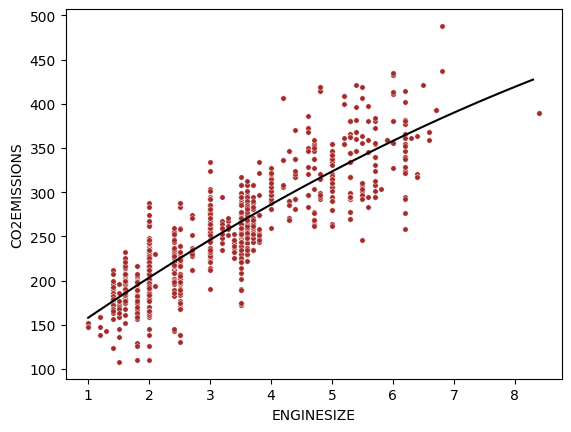

In [11]:
sns.scatterplot(x=x, y=y, s=15, color='brown')
sns.lineplot(x=XX, y=poly_ys, color='black')

# 
<div class="alert alert-block alert-info" style="margin-top: 20px" color= 'cyan'>Important</div>


#### Check accuracy for each degree

In [12]:
number_degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt_mean_squared_error = []
for degree in number_degrees:

    poly_ = PolynomialFeatures(degree=degree)

    train_x_poly = poly_.fit_transform(train_x)
    test_x_poly = poly_.transform(test_x)

    regr_ = linear_model.LinearRegression()
    regr_.fit(train_x_poly, train_y)
    y_pred = regr_.predict(test_x_poly)

    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_pred))
    plt_mean_squared_error.append(rootMeanSqErr)

rmse = {'Degrees': number_degrees, 'RMSE': plt_mean_squared_error}
rmse_df = pd.DataFrame(rmse)

<Axes: >

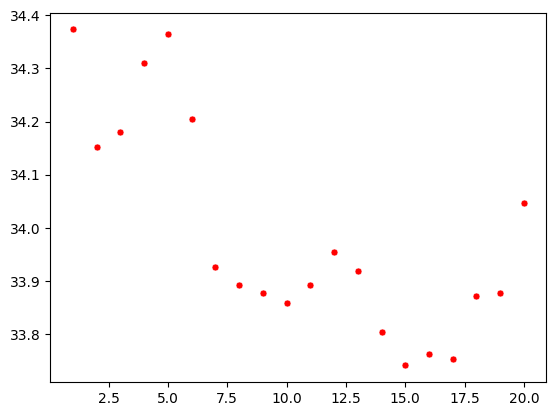

In [13]:
# print(rmse_df)
sns.scatterplot(x=number_degrees, y=plt_mean_squared_error,color='red',s=25)

#### Predict

In [14]:
value = 6.9

# Transform the value into polynomial features
value_poly = poly.transform(np.array([[value]]))

print(regr.predict(value_poly))

[[386.77524411]]


In [ ]:
session_info.show()